# Total orders daily

1. *Perform the calculation in aggregate query.*
2. *Perform the calculation in python.*
3. *Which one is faster.*
4. *Plot the line plot on seaborn.*

In [1]:
import pandas as pd
import import_ipynb
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from DBHandler import MongoDB as db

importing Jupyter notebook from DBHandler.ipynb


### Perform the calculation in python

In [13]:
bhmic_df = pd.DataFrame(list(db.getCollection().find()))
vergan_df = bhmic_df[bhmic_df['target'] == 'vergani']
pd_query = vergan_df['date'].dt.date.value_counts().sort_index().reset_index().rename(columns={"index": "Date", "date": "Orders"})

In [14]:
pd.DataFrame(pd_query)

,Date,Orders
0,2019-06-11,3
1,2019-06-12,5
2,2019-06-13,7
3,2019-06-14,3
4,2019-06-15,5
...,...,...
58,2019-08-08,18
59,2019-08-09,8
60,2019-08-10,6
61,2019-08-11,9


In [56]:
# vergan_df.groupby(vergan_df['date'].dt.date).count()['date']
# vergan_df.loc[vergan_df['date'].dt.date == datetime.date(2019, 7, 29)].count()

### Perform the calculation in aggregate query.

In [3]:
pipeline = [
    {'$match' : {"target" : "vergani"}},
    {'$group' : {'_id' : {'$dateToString': {'format' : "%Y-%m-%d",'date': "$date"}},'count':{'$sum':1}}},
    {'$project': {'_id': 0,'Date': '$_id','Orders': '$count'}},
    {'$sort' : { 'Date': 1 }}
]

agg_query = db.getCollection().aggregate(pipeline)

In [4]:
pd.DataFrame(list(agg_query))

,Date,Orders
0,2019-06-11,3
1,2019-06-12,5
2,2019-06-13,7
3,2019-06-14,3
4,2019-06-15,5
...,...,...
58,2019-08-08,18
59,2019-08-09,8
60,2019-08-10,6
61,2019-08-11,9


### Which one is faster

In [15]:
%%timeit 
bhmic_df = pd.DataFrame(list(db.getCollection().find()))
vergan_df = bhmic_df[bhmic_df['target'] == 'vergani']
vergan_df['date'].dt.date.value_counts().sort_index().reset_index().rename(columns={"index": "Date", "date": "Orders"})

24.1 ms ± 673 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
%%timeit
pipeline = [
    {'$match' : {"target" : "vergani"}},
    {'$group' : {'_id' : {'$dateToString': {'format' : "%Y-%m-%d",'date': "$date"}},'count':{'$sum':1}}},
    {'$project': {'_id': 0,'Date': '$_id','Orders': '$count'}},
    {'$sort' : { 'Date': 1 }}
]
db.getCollection().aggregate(pipeline)

3.48 ms ± 23.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Plot the line plot on seaborn

In [17]:
df = pd.DataFrame(db.getCollection().aggregate(pipeline))

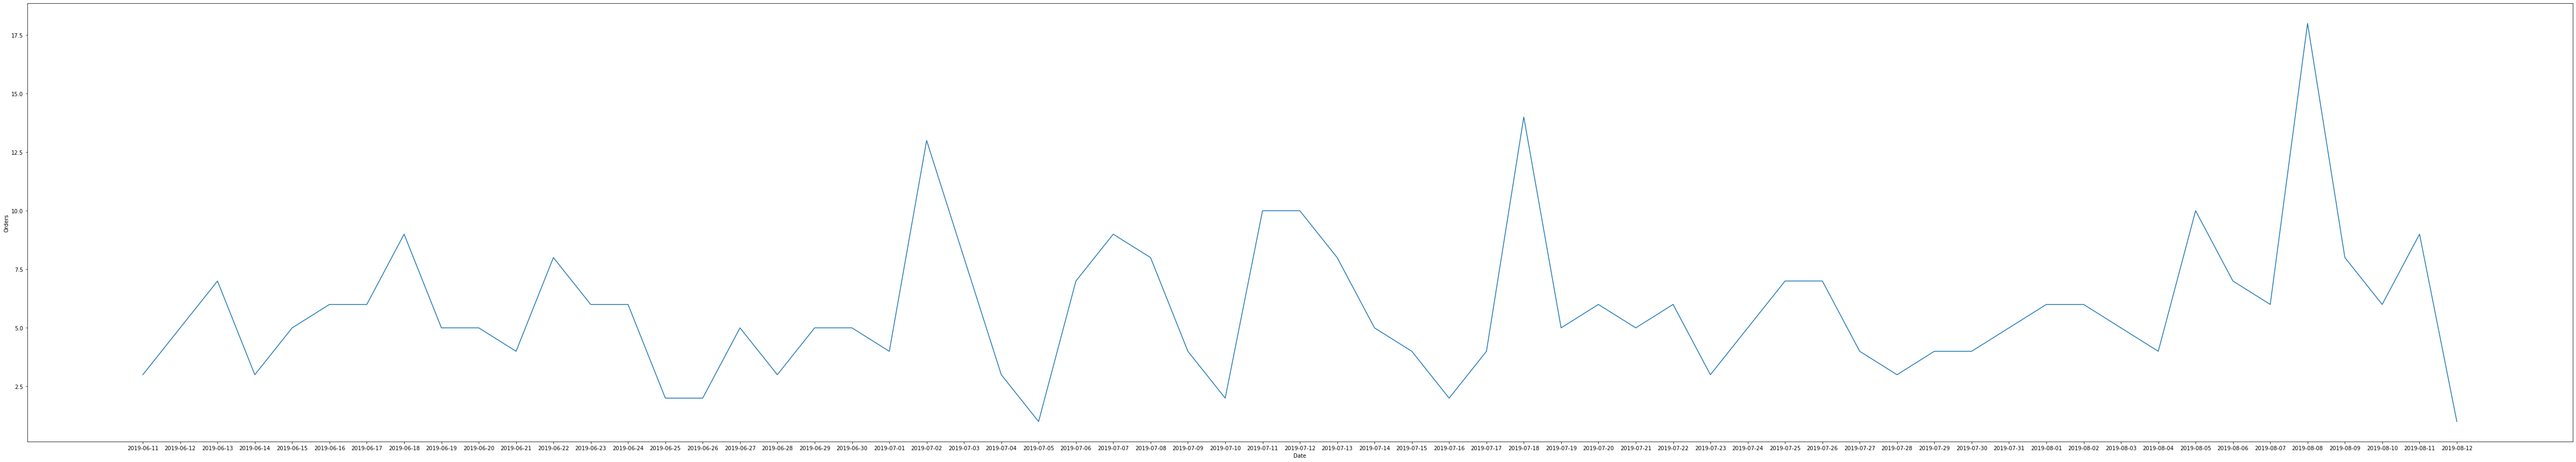

In [18]:
plt.figure(figsize=(85, 15))
g = sns.lineplot(x = "Date", y = "Orders", data=df)
g.figure.savefig("TotalOrdersDaily.png")